In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


After loading the MNSIT data, we split it into train and testing datasets

* `x_train`: This variable holds the training images. It’s a NumPy array where each element is a grayscale image of a handwritten digit. The shape of x_train is typically (60000, 28, 28), which means there are 60,000 images, and each image is 28x28 pixels in size.

* `y_train`: This variable holds the labels (the correct digit) for each image in the training set. It’s a NumPy array with 60,000 elements, and each element is a number from 0 to 9 representing the digit in the corresponding image from x_train.

* `x_test`: This variable holds the test images, which are used to evaluate the model's performance after training. It’s a NumPy array of shape (10000, 28, 28), meaning there are 10,000 images in the test set, each of size 28x28 pixels.

* `y_test`: This variable holds the labels for the test images, similar to y_train. It’s a NumPy array with 10,000 elements, and each element is a number from 0 to 9 representing the digit in the corresponding image from x_test.


Each element in x_train[i] and x_test[i] are in [0, 255]; 255 is white, 0 is black
The digit is white (and changes near the edges to more grayish)

In [5]:
print(type(x_train), x_train.shape)
# x_train is a 28x28 matrix

<class 'numpy.ndarray'> (60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt

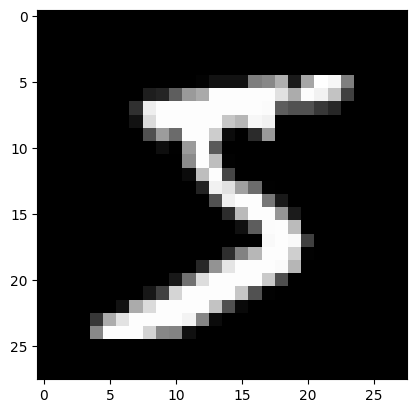

In [7]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

We need to normalize from [0, 255] to [0, 1]
axis = 1 is rows, axis = 0 is columns
So we divide rowwise and keep an L2 of 1


If we didn't scale our input training matrices, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another. So **always** normalize before inputting into a NN or gradient based model!

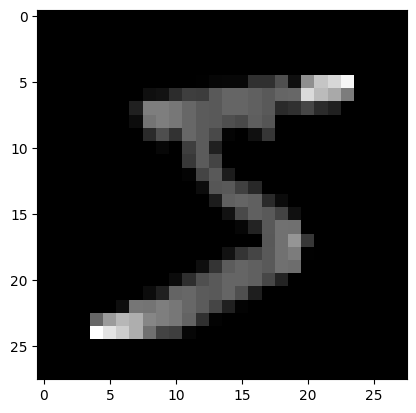

In [8]:
# x_train = x_train / 255.0
# x_test = x_test / 255.0
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap="gray")

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We need to tell the deep learning architecture that x_train[0] is a 5, as y_train[0] says

Now let's Resize the image to make it suitable for the convolution operation

* -1: This tells NumPy to automatically infer the size of this dimension based on the size of the other dimensions. In this case, -1 will automatically be the number of images (e.g., 60,000 for x_train and 10,000 for x_test).

* IMG_SIZE, IMG_SIZE: These correspond to the image dimensions (28x28 pixels). After reshaping, the images retain their original size.

* 1: This adds a channel dimension to the images. For grayscale images like MNIST, the channel is 1 (indicating that there is only one color channel). If these were RGB images, the number of channels would be 3 (for Red, Green, and Blue).


What is channel dimension?
In a grayscale image, the data is a matrix of dimensions 𝑤×ℎ, where 𝑤 is the width of the image and ℎ is its height. In a color image, we normally have 3 channels: red, green and blue; this way, a color image can be represented as a matrix of dimensions 𝑤×ℎ×𝑐, where 𝑐

is the number of channels, that is, 3.

A convolution layer receives the image (𝑤×ℎ×𝑐
) as input, and generates as output an activation map of dimensions 𝑤′×ℎ′×𝑐′. The number of input channels in the convolution is 𝑐, while the number of output channels is 𝑐′. The filter for such a convolution is a tensor of dimensions 𝑓×𝑓×𝑐×𝑐′, where 𝑓

is the filter size (normally 3 or 5).

This way, the number of channels is the depth of the matrices involved in the convolutions. Also, a convolution operation defines the variation in such depth by specifying input and output channels.

In [10]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Now let's create the Deep CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Why 3x3 Convolution Filters?

Using 3x3 filters is a widely adopted practice in modern CNN architectures
* Small enough to get local features, larger ones might capture too much detail at once and overfit
* Stacking multiple 3x3 filters is often more effective than using a larger filter. For example, two consecutive 3x3 convolutional layers have a receptive field
* Stackked 3x3 are more parameter efficient than bigger ones

## Why ReLU?
The ReLU (Rectified Linear Unit) activation function has become the default choice in modern neural networks
* Introduces non-linearity, else you can't capture complex patterns
* Avoid vanishing gradient backpropogation problem

## Pooling
We use max pooling
* Pooling helps make the model more translation invariant, meaning it can detect features regardless of their position in the image.
* In the final convolutional layer, it's common not to apply max pooling right before flattening
  * You save more information this way

In [12]:
# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))) # 32 filters
model.add(MaxPooling2D((2, 2)))
# This layer applies max pooling with a 2x2 filter, which reduces the spatial
# dimensions of the feature maps by taking the maximum value in each 2x2 block.

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# There’s no pooling here, as we want to keep the feature maps for the next step

# Flatten the feature maps into a single vector
model.add(Flatten())

# Fully Connected (Dense) Layers
model.add(Dense(64, activation='relu'))

# Output Layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Why Flatten Before Dense Layers?
We are flattening the feature map outputs, since the convolutional layers output feature maps.
Flattening converts the 3D feature maps (with height, width, and channel dimensions) into a 1D vector, which **dense layers** need input to be 1D.

The input to a convolutional layer is a 3D tensor with the shape (height, width, channels).

# Explain `model.summary()` output shape
What is the None? It represents `batch size` aka how many samples are processed by the model before the model’s parameters (weights) are updated.
* Larger batch sizes provide smoother gradients but require more memory.
* Smaller batch sizes provide more frequent updates but with noisier gradients.
By gradient, it is the backpropogation stuff (derivatives of the loss function)

`None` means the batch size is dynamic

In [13]:

print(123)

123


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.8377 - loss: 0.4942 - val_accuracy: 0.9739 - val_loss: 0.0832
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9786 - loss: 0.0684 - val_accuracy: 0.9808 - val_loss: 0.0613
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9846 - val_loss: 0.0501
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9907 - loss: 0.0313 - val_accuracy: 0.9813 - val_loss: 0.0619
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9848 - val_loss: 0.0548


In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9818 - loss: 0.0541
Test accuracy: 0.9853000044822693
Test loss: 0.04260602593421936


In [19]:
# Get all weights in the model
weights = model.get_weights()

# Print the weights layer by layer
for i, layer_weights in enumerate(weights):
    print(f"Weights of layer {i}:")
    print(layer_weights)

Weights of layer 0:
[[[[-1.17051117e-01 -2.99010910e-02  3.86738181e-02 -3.21204662e-02
     1.33270979e-01 -1.26389652e-01 -5.61507493e-02  9.14738253e-02
     1.32518575e-01 -4.34273213e-01 -1.09377824e-01  2.86005926e-03
     8.90901685e-02  1.34387344e-01  9.36803073e-02  8.66253898e-02
    -3.57485384e-01 -3.25261429e-02  5.13321273e-02 -2.01861590e-01
    -4.08704698e-01  4.83154953e-02 -2.26981454e-02  1.31230103e-02
    -7.84774721e-02  1.11907616e-01  2.90981960e-02  8.37956145e-02
     1.60652757e-01 -5.23133278e-02  1.23332348e-02 -1.97842136e-01]]

  [[ 1.30173996e-01 -3.41268748e-01  1.48363918e-01  1.17448688e-01
    -2.09230468e-01 -5.47370791e-01  1.40206972e-02  2.73173869e-01
     6.96304515e-02 -1.83259755e-01 -4.66672957e-01 -3.35413158e-01
     1.12262160e-01  5.78982681e-02  1.49221241e-01 -3.20389234e-02
    -4.65666771e-01  9.36186761e-02  1.53379217e-01  3.10536777e-03
    -2.55275909e-02  1.22095041e-01  2.12820649e-01  1.50664702e-01
    -3.90776426e-01  2.99

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


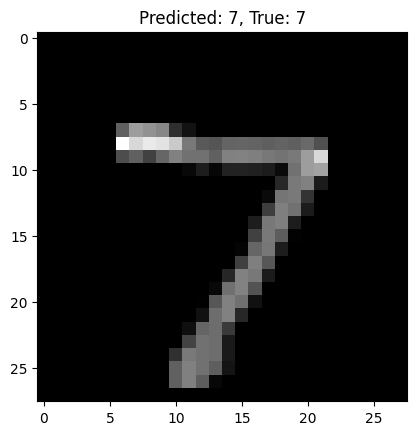

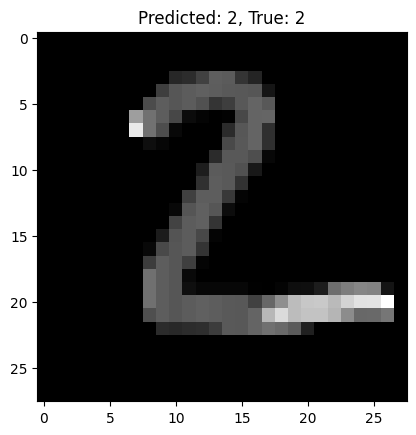

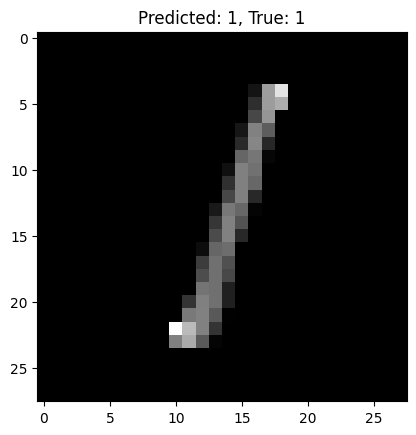

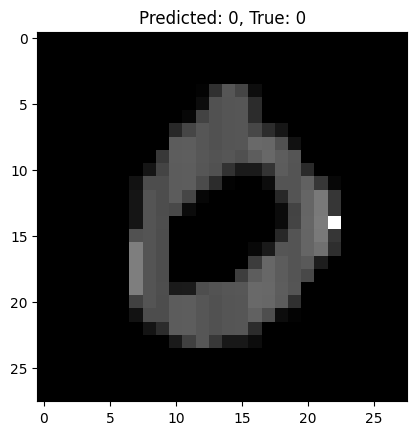

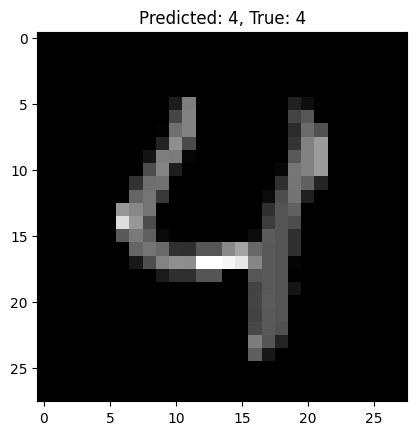

In [22]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, True: {y_test[i]}')
    plt.show()

In [24]:
model.save('written_digit_recognition.keras')

In [27]:
from huggingface_hub import notebook_login

notebook_login()

In [31]:
from huggingface_hub import HfApi

# Initialize the Hugging Face API
api = HfApi()

# Define the repository where you want to upload your model
repo_id = "saileshp56/Written_Digit_Recognition_CNN"  # Replace with your actual username and repo name

# Upload the saved model to Hugging Face
api.upload_file(
    path_or_fileobj="written_digit_recognition.keras",    # Path to your model file
    path_in_repo="written_digit_recognition.keras",       # File name to save in the Hugging Face repo
    repo_id=repo_id,                                   # Correct repository name with username
    repo_type="model"                                  # Specify it's a model upload
)


written_digit_recognition.keras:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/saileshp56/Written_Digit_Recognition_CNN/commit/0d7ecd77783c52cd9db424da444b8aa780fb3d8f', commit_message='Upload written_digit_recognition.keras with huggingface_hub', commit_description='', oid='0d7ecd77783c52cd9db424da444b8aa780fb3d8f', pr_url=None, pr_revision=None, pr_num=None)